In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error

In [2]:
# Load data
df = pd.read_csv('INTC.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,45.959999,47.470001,45.770000,47.080002,41.513241,18774600
1,2019-01-03,46.150002,46.279999,44.389999,44.490002,39.229465,32267300
2,2019-01-04,45.840000,47.570000,45.540001,47.220001,41.636677,35447300
3,2019-01-07,47.099998,48.000000,46.750000,47.439999,41.830650,22736800
4,2019-01-08,47.799999,48.029999,46.779999,47.740002,42.095181,22749200
...,...,...,...,...,...,...,...
1079,2023-04-17,31.950001,32.639999,31.770000,32.139999,32.139999,29601100
1080,2023-04-18,32.430000,32.459999,31.780001,31.830000,31.830000,26041400
1081,2023-04-19,31.100000,31.520000,31.080000,31.150000,31.150000,25746600
1082,2023-04-20,30.760000,31.250000,30.709999,30.860001,30.860001,30255100


In [3]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)

In [4]:
# Show DataFrame
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,45.959999,47.470001,45.770000,47.080002,41.513241,18774600
2019-01-03,46.150002,46.279999,44.389999,44.490002,39.229465,32267300
2019-01-04,45.840000,47.570000,45.540001,47.220001,41.636677,35447300
2019-01-07,47.099998,48.000000,46.750000,47.439999,41.830650,22736800
2019-01-08,47.799999,48.029999,46.779999,47.740002,42.095181,22749200
...,...,...,...,...,...,...
2023-04-17,31.950001,32.639999,31.770000,32.139999,32.139999,29601100
2023-04-18,32.430000,32.459999,31.780001,31.830000,31.830000,26041400
2023-04-19,31.100000,31.520000,31.080000,31.150000,31.150000,25746600


In [5]:
# Descriptive Statistical
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1.084000e+03
mean,48.699363,49.310415,48.104982,48.709797,45.224860,3.131073e+07
std,10.536348,10.628043,10.439233,10.536673,9.059149,1.619271e+07
min,24.730000,25.120001,24.590000,24.900000,24.408895,6.313200e+06
25%,45.177499,45.745000,44.549999,45.020000,41.560767,2.053605e+07
50%,50.524999,51.195000,49.990000,50.610001,46.553512,2.807305e+07
75%,56.345000,56.719999,55.709999,56.082501,51.975154,3.713008e+07
max,68.199997,69.290001,67.309998,68.470001,63.608192,1.822699e+08


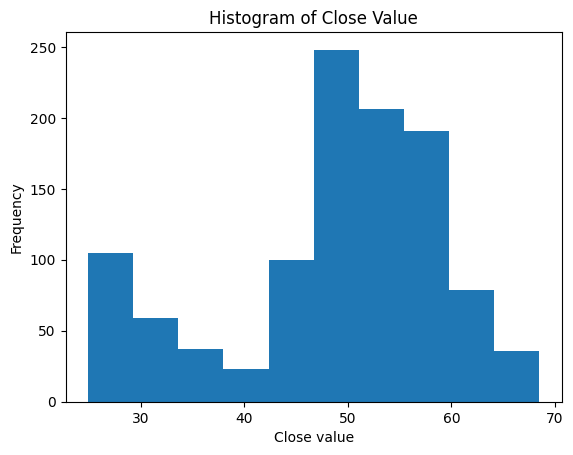

In [6]:
#  Draw a histogram
plt.hist(df['Close'])

# Set label and title
plt.xlabel('Close value')
plt.ylabel('Frequency')
plt.title('Histogram of Close Value')

# Display histogram
plt.show()

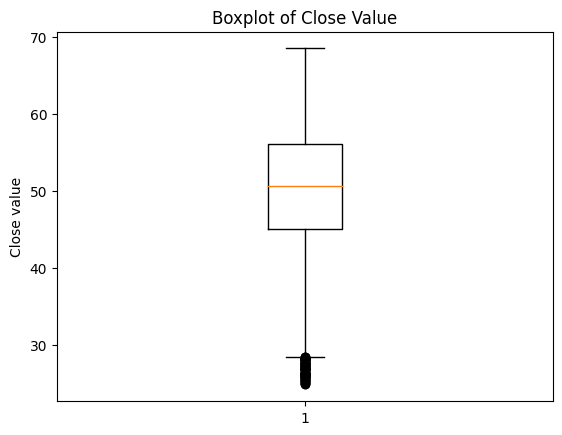

In [7]:
# Draw a boxplot
plt.boxplot(df.Close)

# Set label and title
plt.title("Boxplot of Close Value")
plt.ylabel("Close value")

# Hiển thị biểu đồ
plt.show()

In [8]:
# Select column 'Close'
df_Close = df[['Close']]

In [9]:
# Split the data into train, test, and validate sets in a ratio of 7:2:1
train_size = int(0.7 * len(df_Close))
test_size = int(0.2 * len(df_Close))
val_size = len(df_Close) - train_size - test_size

train_data = df_Close[: train_size]
test_data = df_Close[train_size : train_size + test_size]
val_data = df_Close[train_size + test_size :]

In [10]:
# Training on the train set and testing on the test set
history = train_data.Close.tolist()
y_pred = []

for i in test_data.Close:
  model = SimpleExpSmoothing(history)
  model_fit = model.fit(smoothing_level = 0.7)
  prediction = model_fit.forecast()  
  y_pred.append(prediction[0])
  history.append(i)

In [11]:
# Using the train set and the test set for training, then predicting on the validation set
y_pred_val = []

for i in val_data.Close:
  model = SimpleExpSmoothing(history)
  model_fit = model.fit(smoothing_level = 0.7)
  prediction = model_fit.forecast()  
  y_pred_val.append(prediction[0])
  history.append(i)

In [12]:
# Evaluate the accuracy of test
test_mae = mean_absolute_error(test_data, y_pred)
test_mape = mean_absolute_percentage_error(test_data, y_pred)
test_mse = mean_squared_error(test_data, y_pred)
test_rmse = np.sqrt(test_mse)
test_msle = mean_squared_log_error(test_data, y_pred)

print(f"MAE on Test set: ", test_mae)
print(f"MAPE on Test set: ", test_mape)
print(f"MSE on Test set: ", test_mse)
print(f"RMSE on Test set: ", test_rmse)
print(f"MSLE on Test set: ", test_msle)

MAE on Test set:  0.7846007059047421
MAPE on Test set:  0.019897081051317492
MSE on Test set:  1.0306890154500188
RMSE on Test set:  1.015228553307096
MSLE on Test set:  0.0006171451400375121


In [13]:
# Evaluate the accuracy of validate
val_mae = mean_absolute_error(val_data, y_pred_val)
val_mape = mean_absolute_percentage_error(val_data, y_pred_val)
val_mse = mean_squared_error(val_data, y_pred_val)
val_rmse = np.sqrt(val_mse)
val_msle = mean_squared_log_error(val_data, y_pred_val)

print(f"MAE on Validate set: ",val_mae)
print(f"MAPE on Validate set: ", val_mape)
print(f"MSE on Validate set: ", val_mse)
print(f"RMSE on Validate set: ", val_rmse)
print(f"MSLE on Validate set: ", val_msle)

MAE on Validate set:  0.5626769917214655
MAPE on Validate set:  0.01961777303900719
MSE on Validate set:  0.5161678032152165
RMSE on Validate set:  0.718448191044571
MSLE on Validate set:  0.0005838300150576495


In [14]:
# The process of creating index predict next 30 days

# Get the last date from the current index
last_date = df.index[-1]

# Add one day to the last date
next_date = last_date + pd.DateOffset(days=1)

# Create a list of indices starting from the next date for 30 days
index_next_30_days = pd.date_range(start=next_date, periods=30).tolist()

# Predict the closing prices for the next 30 days
y_next_30_days = []

for i in range(30):
  model = SimpleExpSmoothing(history)
  model_fit = model.fit(smoothing_level = 0.7)
  prediction = model_fit.forecast()  
  y_next_30_days.append(prediction[0])
  history.append(prediction[0])

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[30.51454073710268, 30.514540737102678, 30.514540737102678, 30.514540737102678, 30.514540737102678, 30.514540737102678, 30.514540737102678, 30.514540737102678, 30.514540737102678, 30.514540737102678, 30.514540737102678, 30.514540737102678, 30.514540737102678, 30.514540737102678, 30.514540737102678, 30.514540737102678, 30.514540737102678, 30.514540737102678, 30.514540737102678, 30.514540737102678, 30.514540737102678, 30.514540737102678, 30.514540737102678, 30.514540737102678, 30.514540737102678, 30.514540737102678, 30.514540737102678, 30.514540737102678, 30.514540737102678, 30.514540737102678]


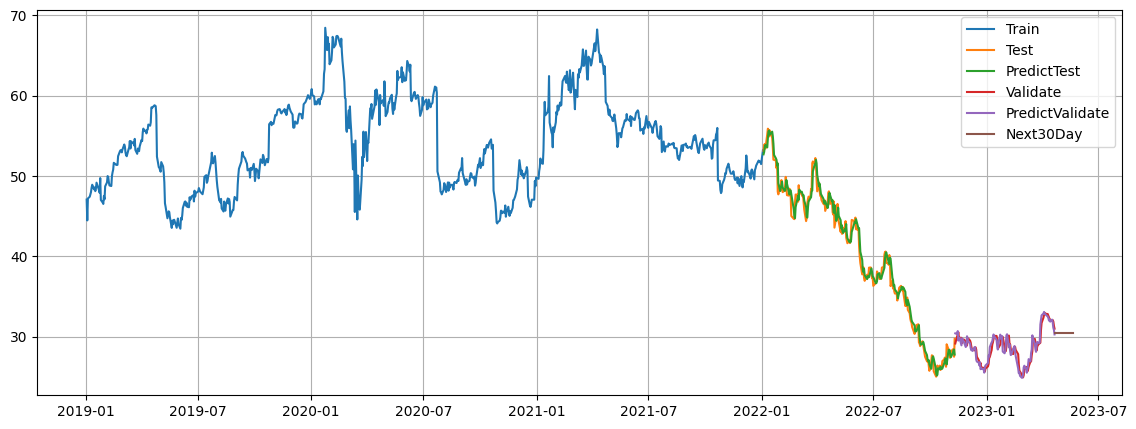

In [15]:
# Drawing
plt.figure(figsize=(14, 5))
plt.plot(df.index[:train_size], train_data)
plt.plot(df.index[train_size : train_size + test_size], test_data)
plt.plot(df.index[train_size : train_size + test_size], y_pred)
plt.plot(df.index[train_size + test_size :], y_pred_val)
plt.plot(df.index[train_size + test_size :], val_data)
plt.plot(index_next_30_days, y_next_30_days)
plt.legend(['Train', 'Test', 'PredictTest', 'Validate', 'PredictValidate', 'Next30Day'])
plt.grid()
plt.savefig('IS403_ETS_INTC.png')
plt.show()